# Experimenting with Bactesting Investment Strategies

## Strategies

1. Buy and hold. You are given a lump sum and you invest it right away

2. Buy and hold, with buy downturns (aka buy the dip)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from backtesting_dev import BuyAndHoldDrawDownStrategySignal, BuyAndHoldStrategySignal
from query_stocks import query_stock_prices
import random

In [2]:
plt.style.use('seaborn-v0_8-pastel')

random.seed(456)
# set seed above to 456
# expected profit: 24505.021713256847
# this is for down turn strategy as it buys on chance sometimes

In [3]:
DOWNLOAD_DATA = False

In [4]:
if DOWNLOAD_DATA:
    start = datetime.date(2019, 1, 18)
    end = datetime.date(2024, 1, 18)
    #strat = BuyAndHoldStrategySignal('VOO', monies = 10000)
    data = query_stock_prices(['VOO'], start_date=start, end_date=end)
    print(data.head())

else:
    voo_df = pd.read_csv("data/voo_df.csv")
    voo_df['Date'] = pd.to_datetime(voo_df['Date'])

## Basic Buy and Hold Strategy

tl;dr Immediately buy as much as possible. Don't think, just buy.

In [5]:
strat = BuyAndHoldStrategySignal('VOO', monies = 10000, income=1000)
strat.run(data=voo_df)

1257it [00:00, 4707.87it/s]


In [6]:
holdings = strat.holdings.to_pandas()
profit_1 = holdings['quantity']*(strat.end_price - holdings['price'])
profit_1.sum()

25383.391815185554

In [7]:
holdings

,symbol,price,quantity,date
0,VOO,244.919998,40.0,2019-01-18
1,VOO,248.009995,4.0,2019-01-31
2,VOO,256.070007,4.0,2019-02-28
3,VOO,259.540009,4.0,2019-03-29
4,VOO,270.010010,4.0,2019-04-30
...,...,...,...,...
59,VOO,392.700012,3.0,2023-09-29
60,VOO,384.170013,3.0,2023-10-31
61,VOO,419.399994,2.0,2023-11-30
62,VOO,436.799988,2.0,2023-12-29


In [8]:
ts_voo = voo_df.set_index('Date')

In [9]:
ts_holdings_1 = holdings.set_index('date') #.asfreq('D')

In [10]:
ts_voo = pd.concat([ts_voo, ts_holdings_1['price']], axis=1)

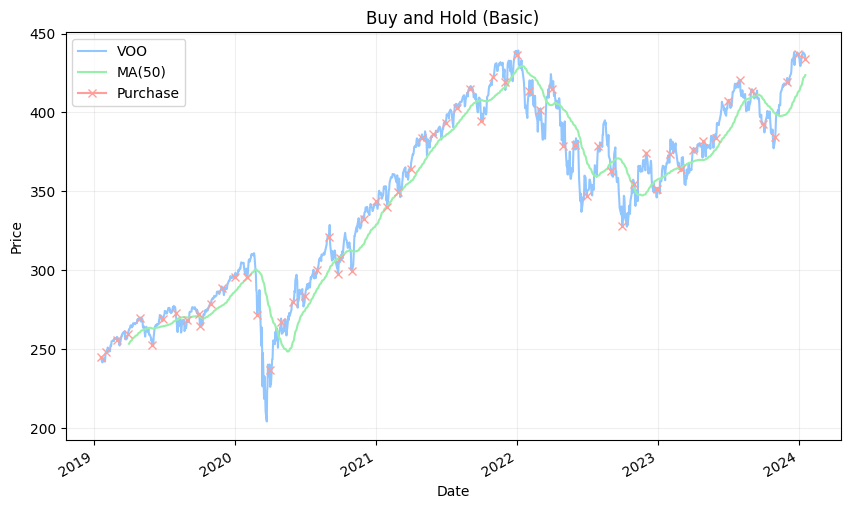

In [11]:
fig, ax = plt.subplots(figsize = (10, 6))
ts_voo['VOO'].plot(ax=ax, label='VOO')
ts_voo['sma_50'].plot(ax=ax, label='MA(50)')
ts_voo['price'].plot(marker='x', ax=ax, label='Purchase')
ax.legend()
ax.set_title("Buy and Hold (Basic)")
ax.set_ylabel("Price")
ax.set_xlabel("Date")
ax.grid(alpha=0.2)


## Downturn Strategy

In [12]:
newstrat = BuyAndHoldDrawDownStrategySignal('VOO', monies=10000, income=1000)
newstrat.run(data=voo_df)


newholdings = newstrat.holdings.to_pandas()
profit_2 = newholdings['quantity']*(newstrat.end_price - newholdings['price'])
profit_2.sum()

# set seed above to 456
# expected profit: 24505.021713256847

1257it [00:00, 4444.32it/s]


24505.021713256847

In [13]:
newholdings

,symbol,price,quantity,date
0,VOO,244.919998,10.0,2019-01-18
1,VOO,258.029999,2.0,2019-05-13
2,VOO,260.269989,2.0,2019-05-14
3,VOO,261.809998,2.0,2019-05-15
4,VOO,262.609985,2.0,2019-05-17
...,...,...,...,...
126,VOO,410.049988,2.0,2023-09-06
127,VOO,392.700012,2.0,2023-09-29
128,VOO,392.670013,1.0,2023-10-02
129,VOO,384.170013,2.0,2023-10-31


In [14]:
ts_voo = voo_df.set_index('Date')

In [15]:
ts_holdings_2 = newholdings.set_index('date') #.asfreq('D')

In [16]:
ts_voo = pd.concat([ts_voo, ts_holdings_2['price']], axis=1)

In [17]:
ts_voo.head()

,VOO,sma_50,price
2019-01-18,244.919998,NaN,244.919998
2019-01-22,241.660004,NaN,NaN
2019-01-23,242.020004,NaN,NaN
2019-01-24,242.259995,NaN,NaN
2019-01-25,244.320007,NaN,NaN


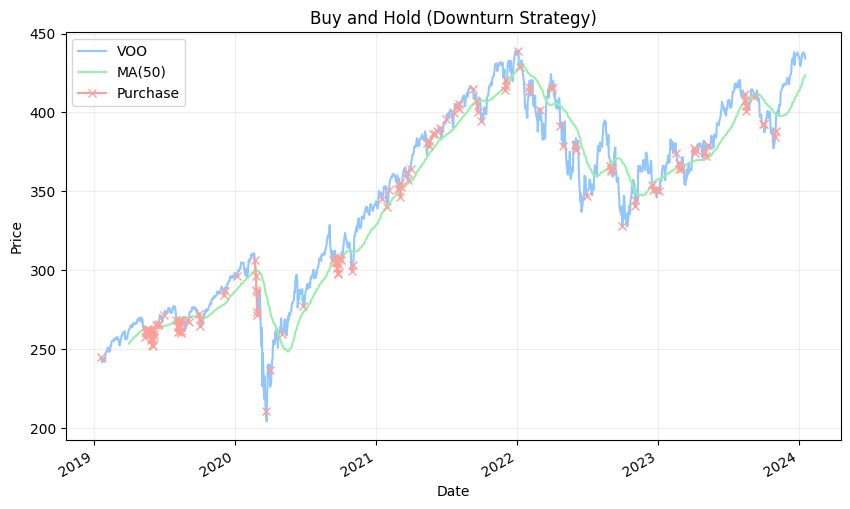

In [18]:
fig, ax = plt.subplots(figsize = (10, 6))
ts_voo['VOO'].plot(ax=ax, label='VOO')
ts_voo['sma_50'].plot(ax=ax, label='MA(50)')
ts_voo['price'].plot(marker='x', ax=ax, label='Purchase')
ax.legend()
ax.set_title("Buy and Hold (Downturn Strategy)")
ax.set_ylabel("Price")
ax.set_xlabel("Date")
ax.grid(alpha=0.2)


In [19]:
voo_df['Date'].dt.year

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
1252    2024
1253    2024
1254    2024
1255    2024
1256    2024
Name: Date, Length: 1257, dtype: int32